# Shobair Abidi - SQL Self-Sufficiency Exam

## Data Exploration

#### Begin Init

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'department_of_education'
db_connection = 'postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db)

### 1. Write a query that allows you to inspect the schema of the naep table.

In [5]:
query = '''
SELECT column_name, data_type
FROM information_schema.columns
WHERE table_name = 'naep'
;'''

resultdf = pd.read_sql(query, db_connection)
resultdf

,column_name,data_type
0,avg_math_4_score,numeric
1,avg_math_8_score,numeric
2,avg_reading_4_score,numeric
3,avg_reading_8_score,numeric
4,id,character varying
5,state,character varying
6,year,integer


### 2. Write a query that returns the first 50 records of the naep table.

In [7]:
query = '''
SELECT *
FROM naep
LIMIT 50
;'''

resultdf = pd.read_sql(query, db_connection)
resultdf

,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score,id,state,year
0,232.171,268.312,216.420,257.687,2017_ALABAMA,ALABAMA,2017
1,230.456,277.016,207.038,257.668,2017_ALASKA,ALASKA,2017
2,234.436,282.248,215.466,262.957,2017_ARIZONA,ARIZONA,2017
3,233.848,273.760,216.108,259.956,2017_ARKANSAS,ARKANSAS,2017
4,232.263,276.638,215.422,262.521,2017_CALIFORNIA,CALIFORNIA,2017
5,240.695,286.248,224.692,270.339,2017_COLORADO,COLORADO,2017
6,239.238,284.144,228.355,272.538,2017_CONNECTICUT,CONNECTICUT,2017
7,236.128,278.023,221.482,263.089,2017_DELAWARE,DELAWARE,2017
8,231.320,265.780,213.382,246.788,2017_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2017
9,246.368,279.120,228.273,280.499,2017_FLORIDA,FLORIDA,2017


### 3. Write a query that returns summary statistics for avg_math_4_score by state. Make sure to sort the results alphabetically by state name.

In [15]:
query = '''
SELECT naep.state, 
    ROUND(MIN(avg_math_4_score), 2) AS min_math_4, 
    ROUND(MAX(avg_math_4_score), 2) AS max_math_4,
    ROUND(AVG(avg_math_4_score), 2) AS mean_math_4,
    ROUND(STDDEV(avg_math_4_score), 2) AS standard_dev
FROM naep
GROUP BY naep.state
ORDER BY naep.state ASC
;'''

resultdf = pd.read_sql(query, db_connection)
resultdf

,state,min_math_4,max_math_4,mean_math_4,standard_dev
0,ALABAMA,208.33,232.86,224.56,8.46
1,ALASKA,223.83,237.27,234.01,4.41
2,ARIZONA,215.25,240.31,229.07,8.39
3,ARKANSAS,210.21,239.89,229.97,10.53
4,CALIFORNIA,208.40,234.17,225.66,10.06
5,COLORADO,221.02,246.98,237.83,8.30
6,CONNECTICUT,226.80,244.72,238.96,5.59
7,DELAWARE,215.03,243.11,234.81,9.94
8,DISTRICT_OF_COLUMBIA,187.14,231.32,212.28,16.02
9,FLORIDA,213.69,246.37,235.66,11.50


### 4. Write a query that alters the previous query so that it returns only the summary statistics for avg_math_4_score by state with differences in max and min values that are greater than 30.

In [13]:
query = '''
SELECT naep.state, 
    ROUND(MIN(avg_math_4_score), 2) AS min_math_4, 
    ROUND(MAX(avg_math_4_score), 2) AS max_math_4,
    ROUND(AVG(avg_math_4_score), 2) AS mean_math_4,
    ROUND(STDDEV(avg_math_4_score), 2) AS standard_dev
FROM naep
GROUP BY naep.state
HAVING MAX(avg_math_4_score) - MIN(avg_math_4_score) > 30
ORDER BY naep.state ASC
;'''

resultdf = pd.read_sql(query, db_connection)
resultdf

,state,min_math_4,max_math_4,mean_math_4,standard_dev
0,DISTRICT_OF_COLUMBIA,187.14,231.32,212.28,16.02
1,FLORIDA,213.69,246.37,235.66,11.50
2,LOUISIANA,204.14,234.28,224.77,9.95
3,MISSISSIPPI,201.83,234.69,223.24,11.11
4,NORTH_CAROLINA,212.88,244.80,237.49,10.24


## Data Analysis

### 5. Write a query that returns a field called bottom_10_states that lists the states in the bottom 10 for avg_math_4_score in the year 2000.

In [18]:
query = '''
SELECT naep.state AS bottom_10_states_y2000, ROUND(avg_math_4_score, 2) AS math_4_score_y2000
FROM naep
WHERE year = 2000
ORDER BY avg_math_4_score ASC
LIMIT 10
;'''

resultdf = pd.read_sql(query, db_connection)
resultdf

,bottom_10_states_y2000,math_4_score_y2000
0,DISTRICT_OF_COLUMBIA,193.29
1,MISSISSIPPI,210.97
2,CALIFORNIA,213.57
3,NEW_MEXICO,213.87
4,HAWAII,215.85
5,ARKANSAS,217.06
6,ALABAMA,217.94
7,LOUISIANA,217.96
8,ARIZONA,218.77
9,GEORGIA,219.56


### 6. Write a query that calculates the average avg_math_4_score rounded to the nearest 2 decimal places over all states in the year 2000.

In [25]:
query = '''
SELECT ROUND(AVG(avg_math_4_score), 2) AS avg_math_4_y2000
FROM naep
WHERE year = 2000
;'''

resultdf = pd.read_sql(query, db_connection)
resultdf

,avg_math_4_y2000
0,224.8


### 7. Write a query that returns a field called below_average_states_y2000 that lists all states with an avg_math_4_score less than the average over all states in the year 2000.

In [24]:
query = '''
SELECT state AS below_average_states_y2000, ROUND(avg_math_4_score, 2) AS math_4_score_y2000
FROM naep
WHERE year = 2000
    AND avg_math_4_score <= (
        SELECT AVG(avg_math_4_score)
        FROM naep
        WHERE year = 2000
    )
ORDER BY math_4_score_y2000 ASC
;'''

resultdf = pd.read_sql(query, db_connection)
resultdf

,below_average_states_y2000,math_4_score_y2000
0,DISTRICT_OF_COLUMBIA,193.29
1,MISSISSIPPI,210.97
2,CALIFORNIA,213.57
3,NEW_MEXICO,213.87
4,HAWAII,215.85
5,ARKANSAS,217.06
6,ALABAMA,217.94
7,LOUISIANA,217.96
8,ARIZONA,218.77
9,GEORGIA,219.56


#### They do overlap as we expect, since the bottom ten results are intrinsically below average in a list of 51

### 8. Write a query that returns a field called scores_missing_y2000 that lists any states with missing values in the avg_math_4_score column of the naep data table for the year 2000.

In [27]:
query = '''
SELECT state AS scores_missing_y2000
FROM naep
WHERE year = 2000
    AND avg_math_4_score IS NULL
;'''

resultdf = pd.read_sql(query, db_connection)
resultdf

,scores_missing_y2000
0,ALASKA
1,COLORADO
2,DELAWARE
3,FLORIDA
4,NEW_HAMPSHIRE
5,NEW_JERSEY
6,PENNSYLVANIA
7,SOUTH_DAKOTA
8,WASHINGTON
9,WISCONSIN


#### I likely wouldn't change how I report the bottom 10 values, considering this piece of information regarding the NULL values.  I would however append my results for the below average results and include the non-reporting states in that Data set.

### 9. Write a query that returns for the year 2000 the state, avg_math_4_score, and total_expenditure from the naep table left outer joined with the finance table, using id as the key and ordered by total_expenditure greatest to least. Be sure to round avg_math_4_score to the nearest 2 decimal places, and then filter out NULL avg_math_4_scores in order to see any correlation more clearly.

,state,math_4_score_y2000,total_expenditure_y2000
0,CALIFORNIA,213.57,45829753
1,NEW_YORK,226.56,33683043
2,TEXAS,232.67,31067935
3,ILLINOIS,224.93,18073190
4,MICHIGAN,230.89,16580526
5,OHIO,230.57,14909952
6,GEORGIA,219.56,10884510
7,MASSACHUSETTS,234.96,9466363
8,NORTH_CAROLINA,232.46,9275837
9,VIRGINIA,230.40,9154676


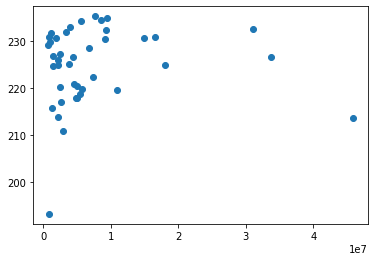

In [34]:
query = '''
SELECT naep.state, ROUND(naep.avg_math_4_score, 2) AS math_4_score_y2000, finance.total_expenditure AS total_expenditure_y2000
FROM naep
LEFT OUTER JOIN finance
ON naep.id = finance.id
WHERE naep.year = 2000
    AND naep.avg_math_4_score IS NOT NULL
ORDER BY finance.total_expenditure DESC NULLS LAST
;'''

resultdf = pd.read_sql(query, db_connection)
display(resultdf)
resultplt = plt.scatter(resultdf['total_expenditure_y2000'], resultdf['math_4_score_y2000'])